In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [3]:
ls

Look at rescaling factor.ipynb  mmc6.xlsx
MS_results_43.csv               sample_info_43.csv
SF_select_genes.pdf             seqfish-data-43.pdf
SeqFISH Analysis.ipynb          seqfish-pval-histogram.pdf
SeqFISH Results.ipynb           sigma_pval_SF.pdf
exp_mat_43.csv                  spatial_SeqFISH_analysis.py
final_results_43.csv            top_SF_genes_per_ls.pdf
mmc5.xlsx


In [4]:
results = pd.read_csv('final_results_43.csv', index_col=0)
ms_results = pd.read_csv('MS_results_43.csv', index_col=0)
sample_info = pd.read_csv('sample_info_43.csv', index_col=0)

In [5]:
df = pd.read_csv('exp_mat_43.csv', index_col=0)
df.columns = df.columns.map(int)

dfm = np.log10(df + 1)

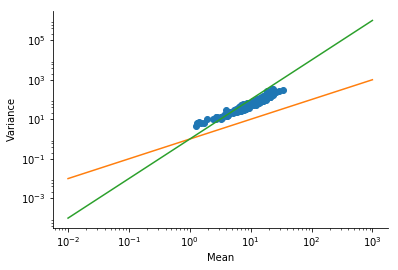

In [6]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

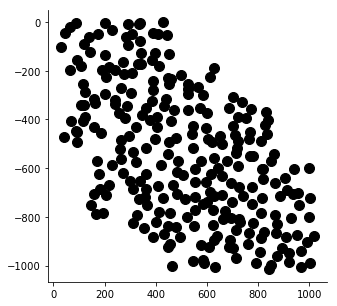

In [7]:
figsize(5, 5)
plt.scatter(sample_info.x, -sample_info.y, s=100, c='k');

In [8]:
from scipy import spatial

In [9]:
tmp = sample_info[['x', 'y']].copy()
tmp['y'] = -tmp['y']
vor = spatial.Voronoi(tmp.values)

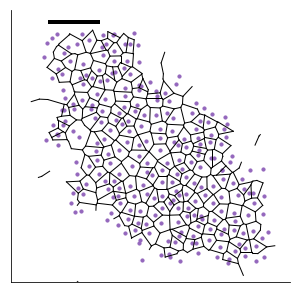

In [10]:
figsize(5, 5)

plt.scatter(*vor.points.T, c='tab:purple', marker='.', s=40)

distances = []
for r in vor.ridge_dict.values():
    xy1 = vor.vertices[r[0]]
    xy2 = vor.vertices[r[1]]
    d = spatial.distance.euclidean(xy1, xy2)
    distances.append(d)
    if d > 80:
        continue

    plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]], c='k', lw=1)
    
x0 = 50
plt.hlines(50, x0, x0 + 229, lw=4);

plt.axis('equal');

plt.ylim(-1100, 100);
plt.xlim(-100, 1100);
plt.xticks([])
plt.yticks([]);

plt.savefig('seqfish-data-43.pdf');

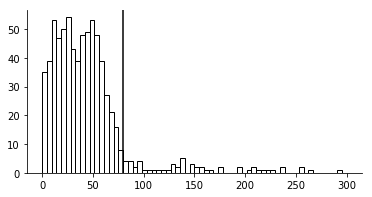

In [11]:
figsize(6, 3)
plt.hist(distances, bins=64, range=[0, 300], fc='none', ec='k');
plt.axvline(80, c='k');

In [12]:
# Length of scalebar
216 / (tmp.x.max() - tmp.x.min()) * 229

49.913218970736629

In [13]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

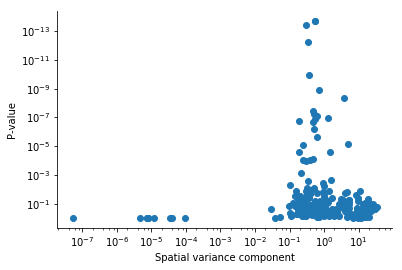

In [14]:
figsize(6, 4)
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

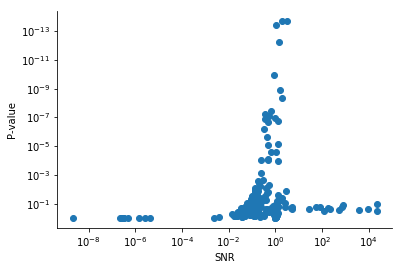

In [15]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('P-value');

In [16]:
results.head().T

,0,1,2,3,4
Gower,0.999996,0.999996,0.999996,0.999996,0.999996
M,4,4,4,4,4
g,'Tal1','Prdm1','Foxa1','Gli1','Mitf'
l,1.41421,1.41421,1.41421,1.41421,1.41421
max_delta,0.992254,0.994808,0.978791,0.965859,0.997854
max_ll,-230.395,-233.167,-252.613,-250.4,-247.329
max_mu_hat,-5.34796,-4.83518,-3.77034,-4.27114,-3.59408
max_s2_t_hat,14.525,11.894,7.39146,9.48387,6.66312
model,SE,SE,SE,SE,SE
n,257,257,257,257,257


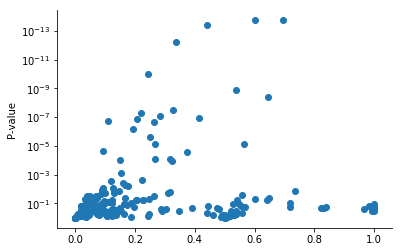

In [17]:
#plt.loglog()
plt.yscale('log')
plt.scatter(results.fraction_spatial_variance, results.pval);
plt.gca().invert_yaxis();
#plt.xlabel('SNR')
plt.ylabel('P-value');

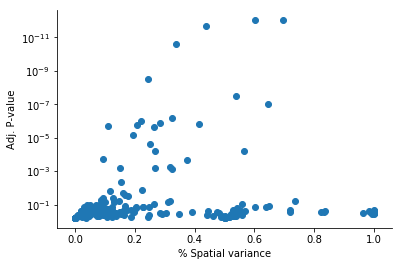

In [18]:
#plt.loglog()
plt.yscale('log')
plt.scatter(results.fraction_spatial_variance, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('% Spatial variance')
plt.ylabel('Adj. P-value');

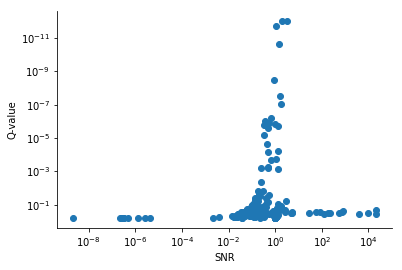

In [19]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Q-value');

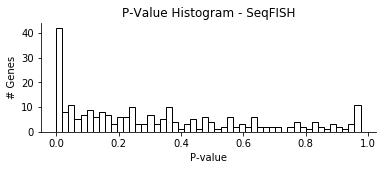

In [20]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=50, color='w', ec='k');
plt.title('P-Value Histogram - SeqFISH')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.savefig('seqfish-pval-histogram.pdf');

In [21]:
results.query('qval < 0.05').shape

(32, 17)

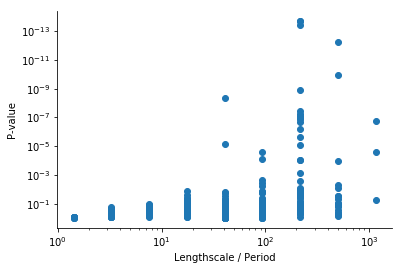

In [22]:
figsize(6, 4)
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

In [23]:
N = 5
top_per_ls = ms_results \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,Gower,LLR,M,fraction_spatial_variance,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,pval,qval,max_ll_null
13,565.537180,0.989165,34.519091,4,0.646029,'sst',40.594851,0.541981,-271.670438,-3.640178,3.655643,SE,257,0.000590,4.220910e-09,9.318893e-08,-306.189529
14,288.223893,0.989165,20.187944,4,0.564428,'gad1',40.594851,0.763344,-133.013794,-4.537315,4.892951,SE,257,0.000483,7.019392e-06,6.381266e-05,-153.201739
18,270.791100,0.938986,17.639135,4,0.373325,'mfge8',93.963664,1.576211,-124.297398,-4.825784,1.515633,SE,257,0.000488,2.670364e-05,2.063463e-04,-141.936533
17,52.327256,0.938986,15.604897,4,0.317745,'xdh',93.963664,2.016174,-15.065476,-2.793217,0.491465,SE,257,0.000590,7.805218e-05,5.744100e-04,-30.670373
16,491.982598,0.938986,8.339367,4,0.160420,'Foxd3',93.963664,4.914311,-234.893147,-4.229639,0.949824,SE,257,0.000922,3.879510e-03,2.141288e-02,-243.232514
15,548.661831,0.938986,7.662816,4,0.178082,'Zfp422',93.963664,4.333785,-263.232763,-4.264572,1.020769,SE,257,0.000918,5.637046e-03,2.903933e-02,-270.895579
27,118.280869,0.745925,91.202982,4,0.696463,'myl14',217.494828,0.325094,-48.042282,-3.927013,0.550495,SE,257,0.000580,1.870726e-14,9.637072e-13,-139.245264
26,187.222151,0.745925,107.080726,4,0.600546,'mog',217.494828,0.496153,-82.512924,-4.030392,0.534444,SE,257,0.000579,1.870726e-14,9.637072e-13,-189.593649
28,193.981058,0.745925,57.298763,4,0.439268,'ndnf',217.494828,0.952185,-85.892377,-3.031026,0.291036,SE,257,0.000396,3.741452e-14,1.927414e-12,-143.191140
24,286.401071,0.745925,36.866246,4,0.538350,'slc17a7',217.494828,0.639652,-132.102383,-4.843513,0.710345,SE,257,0.000487,1.265174e-09,3.258783e-08,-168.968629


In [24]:
top_per_ls.shape

(24, 17)

In [25]:
import NaiveDE
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info, dfm, 'np.log(total_count)').T

In [26]:
top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]

7

In [27]:
model_colors = {'SE': 'C0', 'PER': 'C1', 'linear': 'C2'}

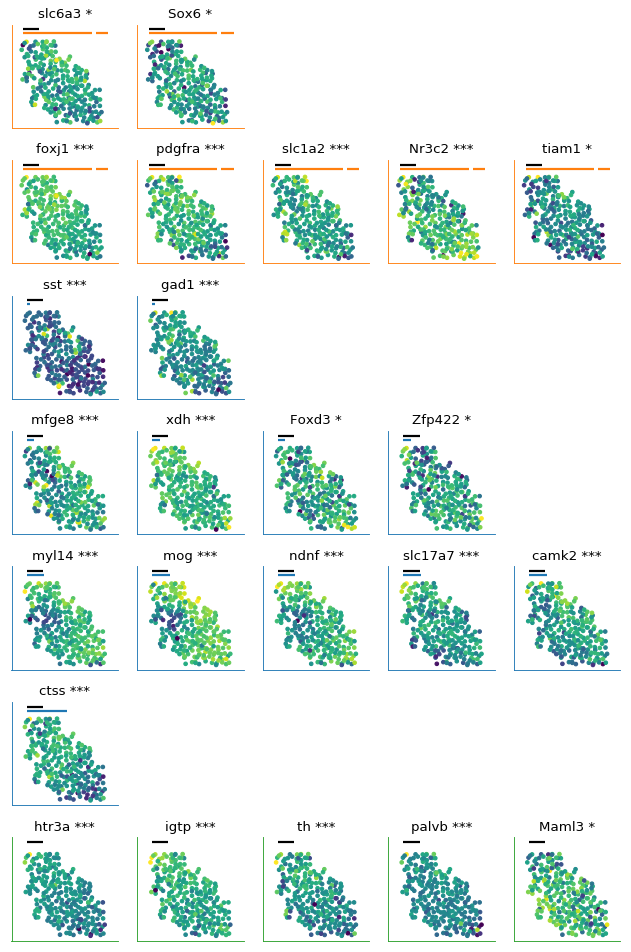

In [28]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]
for j, T in enumerate(top_per_ls.replace(np.nan, 0).groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.x, -sample_info.y, c=res[r['g']], s=10);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'].replace("'", '') + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(150, 50, 250, lw=2)
        if 50 + r['l'] < 1100 and r['model'] != 'linear':
            plt.hlines(100, 50, 50 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
        else:
            if r['model'] != 'linear':
                plt.hlines(100, 50, 900, lw=2, color=model_colors[r['model']], zorder=0)
                plt.hlines(100, 950, 1100, lw=2, color=model_colors[r['model']], zorder=0)
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
        
        plt.axis('equal')
    

plt.tight_layout()
plt.savefig('top_SF_genes_per_ls.pdf')

In [29]:
N = 3
top_per_ls = ms_results \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model', 'l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

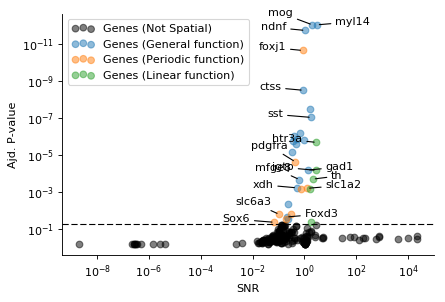

In [39]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Not Spatial)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(1. / tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (General function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic function)', marker='o', color='C1');

tmp = ms_results.query('model == "linear"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Linear function)', marker='o', color='C2');

x_offsets = {"'slc1a2'": 5e0,
             "'gad1'": 5,
             "'Sox6'": 1e-2,
             "'Foxd3'": 5,
             "'myl14'": 5,
            "'th'": 5}
y_offsets = {"'slc6a3'": 3e0,
             "'pdgfra'": 5,
             "'mfge8'": 3,
             "'mog'": 3}
for i, r in top_per_ls.iterrows():
    xy = (1. / r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})


plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Ajd. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_SF.pdf', bbox_inches='tight');

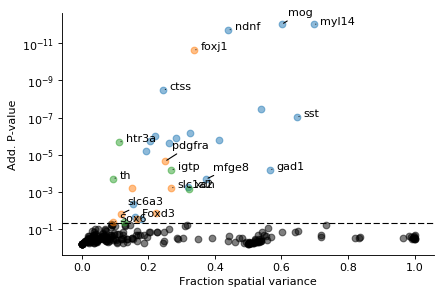

In [38]:
plt.figure(figsize=(6, 4), dpi=80)

plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(  tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (NS)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(  tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (General model)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('fraction_spatial_variance', 1) \
         .merge(results[['g', 'fraction_spatial_variance']], on='g')
plt.scatter(  tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic model)', marker='o', color='C1');


tmp = ms_results.query('model == "linear"')
tmp = tmp.drop('fraction_spatial_variance', 1) \
         .merge(results[['g', 'fraction_spatial_variance']], on='g')
plt.scatter(  tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Linear model)', marker='o', color='C2');


x_offsets = {}
# x_offsets = {"'slc1a2'": 5e0,
#              "'gad1'": 5,
#              "'Sox6'": 1e-2,
#              "'Foxd3'": 5,
#              "'myl14'": 5,
#             "'th'": 5}
y_offsets = {"'slc6a3'": 3e0,
             "'pdgfra'": 5,
             "'mfge8'": 3,
             "'mog'": 3}
tmp = top_per_ls.drop('fraction_spatial_variance', 1) \
         .merge(results[['g', 'fraction_spatial_variance']], on='g')
for i, r in tmp.iterrows():
    xy = (r['fraction_spatial_variance'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})


plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('Fraction spatial variance');
plt.ylabel('Add. P-value');
plt.gca().invert_yaxis()

# plt.legend(scatterpoints=3, loc='upper left');

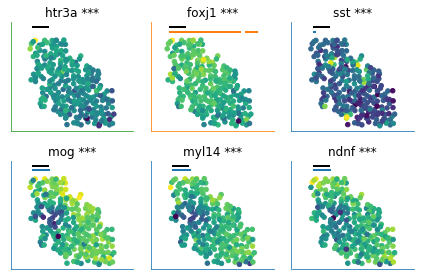

In [37]:
figsize(6, 4)
N = 3
N_rows = 2
gene_sel = ["'mog'", "'myl14'", "'ndnf'", "'foxj1'", "'sst'", "'htr3a'"]
select_genes = ms_results.query('g in @gene_sel')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    ax = plt.subplot(N_rows, N, i + 1)

    plt.scatter(sample_info.x, -sample_info.y, c=res[r['g']], s=20);

    s = ' *'
    if r['qval'] < 0.01:
        s = ' **'

    if r['qval'] < 0.001:
        s = ' ***'

    plt.title(r['g'].replace("'", '') + s)

    plt.xticks([])
    plt.yticks([])
    plt.hlines(150, 50, 250, lw=2)
    if 50 + r['l'] < 1100 and r['model'] != 'linear':
        plt.hlines(100, 50, 50 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
    else:
        if r['model'] != 'linear':
            plt.hlines(100, 50, 900, lw=2, color=model_colors[r['model']], zorder=0)
            plt.hlines(100, 950, 1100, lw=2, color=model_colors[r['model']], zorder=0)

    for spine in ax.spines.values():
        spine.set_edgecolor(model_colors[r['model']])

    plt.axis('equal')


plt.tight_layout()
plt.savefig('SF_select_genes.pdf')